In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import matplotlib.colors as colors

# Inline interactive vis properties in Jupyter lab
%matplotlib ipympl
%matplotlib widget
%matplotlib inline

# Load data

In [2]:
# data summary
ds = pd.read_csv('data_summary.csv')
data = pd.read_csv('total_data.csv')

In [3]:
ds
# exp4 wind from east-southeast (ESE)
# exp12 is further away
# 0 days of recording

,Unnamed: 0,Experiment,X,day,Date,Instrument,Drone,Wind_Dir,Wind_Dir.1,WindSpeed,Radiation,Temperature,RH,Pressure,PGClass,boat.lat,boat.lon,WS_max
0,1,Exp1,tilt,1,15/03/2021,aMCPC,HYBRiX,110.28,ESE,3.99,668.95,27.33,69.41,1009.7,C,-18.85150,147.72110,3.823
1,2,Exp2,tilt,2,17/03/2021,DiSCmini,M600,47.86,NE,3.83,2297.11,27.70,71.82,1010.5,B,-18.85180,147.72110,4.323
2,3,Exp3,tilt,2,17/03/2021,aMCPC,HYBRiX,47.90,NE,3.83,321.94,27.76,71.44,1008.2,C,-18.85150,147.72110,4.727
3,4,Exp4,horizontal,3,18/03/2021,DiSCmini,M600,108.85,ESE,3.14,572.28,27.52,71.21,1009.6,C,-18.85068,147.71720,2.765
4,5,Exp5,horizontal,3,18/03/2021,aMCPC,HYBRiX,77.68,ENE,4.78,821.64,27.10,73.35,1008.1,B,-18.85080,147.71711,1.998
5,6,Exp6,horizontal,4,19/03/2021,DiSCmini,M600,90.79,E,4.83,2081.26,27.37,68.69,1009.5,B,-18.84590,147.70310,5.201
6,7,Exp7,horizontal,4,19/03/2021,aMCPC,M600,113.31,ESE,5.06,698.52,26.12,76.62,1008.0,C,-18.84590,147.70310,5.640
7,8,Exp8,tilt,5,20/03/2021,aMCPC,M600,122.73,ESE,6.04,1635.56,27.40,64.59,1007.4,C,-18.84590,147.70310,6.267
8,9,Exp9,tilt,6,21/03/2021,aMCPC,M600,114.60,ESE,5.29,411.57,27.45,78.51,1008.4,D,-18.84579,147.70290,4.701
9,10,Exp10,tilt,7,22/03/2021,DiSCmini,M600,108.77,ESE,3.53,328.11,27.71,73.45,1008.0,C,-18.84669,147.70310,3.128


In [4]:
# Select one experiment: Experiment 4
exp4 = data[data.Experiment == "Exp4"]

# 13000 data points from 45 minutes
# some seconds have more datapoints than others. Most seconds have 10 datapoints
# 5 Transects
# 21 Transect_nums
    # high variation in true_height within one Transect_num
# Various different heights

exp4

,Unnamed: 0,Date_Time,gps.lat,gps.lon,altitudeRelative,Concentration,TransDate,Test_name,Experiment,Transect,Distance,Transect_Num,Height,Dist_Travelled,Transect_Dist,Time_Elapsed,Peak_Dist
125714,22941.0,2021-03-18 11:44:06,-18.851704,147.714498,45.0,433.607375,18/03/2021,Day2_M600_DM,Exp4,1,250,21,45,0.000000,0.000000,1,-907.677379
125715,22942.0,2021-03-18 11:44:06,-18.851708,147.714491,45.1,433.607375,18/03/2021,Day2_M600_DM,Exp4,1,250,21,45,0.860639,0.992264,2,-906.816740
125716,22943.0,2021-03-18 11:44:06,-18.851706,147.714494,45.1,433.607375,18/03/2021,Day2_M600_DM,Exp4,1,250,21,45,0.380167,1.292812,3,-906.436574
125717,229441.0,2021-03-18 11:44:06,-18.851699,147.714511,45.0,433.607375,18/03/2021,Day2_M600_DM,Exp4,1,250,21,45,1.954718,1.427221,4,-904.481856
125718,229451.0,2021-03-18 11:44:06,-18.851709,147.714487,45.1,433.607375,18/03/2021,Day2_M600_DM,Exp4,1,250,21,45,2.764389,1.660025,5,-901.717467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139060,44588.0,2021-03-18 12:29:49,-18.848444,147.710136,15.0,417.317375,18/03/2021,Day2_M600_DM,Exp4,5,750,40,15,0.000000,1360.874700,785,737.207068
139061,44589.0,2021-03-18 12:29:49,-18.848443,147.710137,15.1,417.317375,18/03/2021,Day2_M600_DM,Exp4,5,750,40,15,0.134409,1361.949974,786,737.341477
139062,44590.0,2021-03-18 12:29:49,-18.848443,147.710136,15.0,417.317375,18/03/2021,Day2_M600_DM,Exp4,5,750,40,15,0.134409,1366.031235,787,737.475886
139063,44591.0,2021-03-18 12:29:49,-18.848444,147.710137,14.9,417.317375,18/03/2021,Day2_M600_DM,Exp4,5,750,40,15,0.134409,1366.568872,788,737.610296


#### Location 

Google Earth link to location: 
https://earth.google.com/web/search/-18.849481%09147.714776/@-18.849481,147.714776,-0.18870091a,993.45209266d,35y,0h,45t,0r/data=ClkaLxIpGcmSOZZ32TLAIef-6nHfdmJAKhUtMTguODQ5NDgxCTE0Ny43MTQ3NzYYAiABIiYKJAlEUFaGZgg9wBHu088tkgREwBn8sYo_hidRQCEuJNka9JJlwCgC

In [5]:
pd.crosstab(index = exp4['Transect_Num'], columns = 'count')
# 30 Transect nums

data[data.Transect_Num == 22]
# altitude may change drasicially within one transect num

pd.crosstab(index = exp4['Height'], columns = 'count')

pd.crosstab(index = exp4['Transect'], columns = 'count')

col_0,count
Transect,
1,2689
2,2636
3,2546
4,2648
5,2832


In [6]:
# Extract values from consistent height
exp4_trans2 = exp4[exp4.Transect == 2]
exp4_trans2_h40 = exp4_trans2[exp4.Height == 40.0]
# exp4_trans2_h40
# same as exp4[exp4.Transect_Num == 22]

# 507 values

C:\Users\Sam\AppData\Local\Temp\ipykernel_15012\42751361.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exp4_trans2_h40 = exp4_trans2[exp4.Height == 40.0]


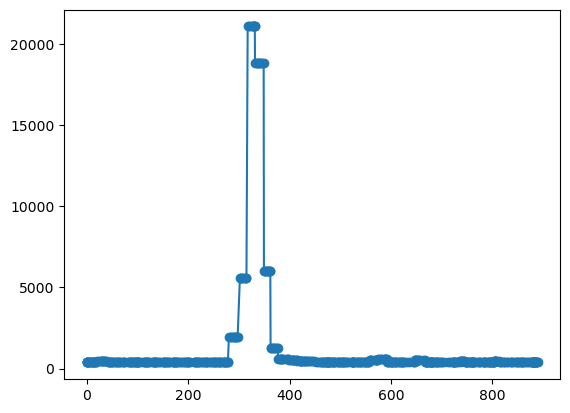

In [7]:
# Add color
plt.plot('Transect_Dist', 'Concentration', data = exp4_trans2_h40, linestyle = '-', marker = 'o')
plt.show()

In [8]:
# Look at all peaks of Experiment 4. Transect_Num == 35 has multiple recorded
exp4[exp4.Peak_Dist == 0][0:16]
exp4[exp4.Peak_Dist == 0][22:]

# Peaks
exp4_peaks = pd.concat([exp4[exp4.Peak_Dist == 0][0:16], exp4[exp4.Peak_Dist == 0][22:]], axis = 0)
exp4_peaks

,Unnamed: 0,Date_Time,gps.lat,gps.lon,altitudeRelative,Concentration,TransDate,Test_name,Experiment,Transect,Distance,Transect_Num,Height,Dist_Travelled,Transect_Dist,Time_Elapsed,Peak_Dist
126187,23414.0,2021-03-18 11:44:56,-18.849727,147.714745,44.8,18860.784500,18/03/2021,Day2_M600_DM,Exp4,1,250,21,45,8.994877,839.447798,474,0.0
126458,23704.0,2021-03-18 11:45:26,-18.850131,147.714688,40.0,21088.497295,18/03/2021,Day2_M600_DM,Exp4,2,250,22,40,2.123070,317.423911,175,0.0
127191,244691.0,2021-03-18 11:46:55,-18.849770,147.714739,29.9,5986.000000,18/03/2021,Day2_M600_DM,Exp4,3,250,23,30,9.631147,724.896364,401,0.0
127438,247661.0,2021-03-18 11:47:26,-18.850147,147.714687,19.9,38442.840455,18/03/2021,Day2_M600_DM,Exp4,4,250,24,20,4.040109,278.420856,156,0.0
128308,256451.0,2021-03-18 11:49:00,-18.849520,147.714773,15.0,53378.108855,18/03/2021,Day2_M600_DM,Exp4,5,250,25,15,2.814581,894.282058,531,0.0
128895,267481.0,2021-03-18 11:51:06,-18.849773,147.712348,70.1,808.001375,18/03/2021,Day2_M600_DM,Exp4,1,500,26,70,8.980807,350.964991,194,0.0
129848,277471.0,2021-03-18 11:52:57,-18.849111,147.712435,55.0,5350.596980,18/03/2021,Day2_M600_DM,Exp4,2,500,27,55,6.843659,919.124360,546,0.0
130127,28073.0,2021-03-18 11:53:31,-18.849828,147.712334,40.0,4776.098255,18/03/2021,Day2_M600_DM,Exp4,3,500,28,40,3.366943,364.217903,203,0.0
131002,28997.0,2021-03-18 11:55:14,-18.849444,147.712391,30.0,6664.349620,18/03/2021,Day2_M600_DM,Exp4,4,500,29,30,2.467425,814.984360,464,0.0
131353,29374.0,2021-03-18 11:55:54,-18.849726,147.712351,14.9,20980.702495,18/03/2021,Day2_M600_DM,Exp4,5,500,30,15,3.476498,428.828791,238,0.0


Observations:

- high variance in Peak_dist concentrations. transect_num 26 for example is very low.

In [9]:
# Bounds
# lon is x
print(np.min(exp4["gps.lon"]))
print(np.max(exp4["gps.lon"]))

# lat is y
print(np.min(exp4["gps.lat"]))
print(np.max(exp4["gps.lat"]))

147.707317
147.714787
-18.851717
-18.847921


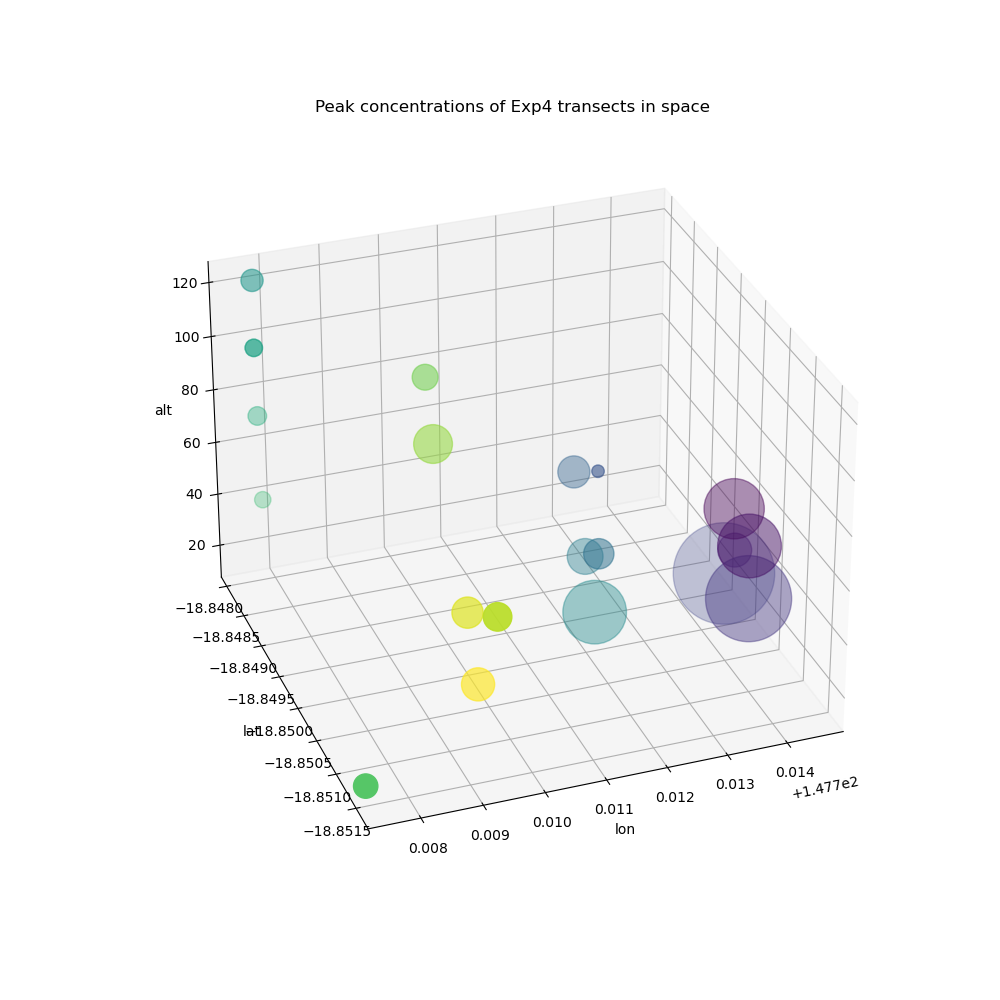

In [10]:
# ipympl works in Jupyter notebook
%matplotlib ipympl

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(projection = '3d')

ax.scatter(exp4_peaks['gps.lon'], exp4_peaks['gps.lat'], exp4_peaks['Height'], 
           s = exp4_peaks['Concentration'].values/10,
           c = exp4_peaks['Transect_Num'].values)

ax.set_ylim((np.min(exp4["gps.lat"]), np.max(exp4["gps.lat"])))
ax.set_xlim((np.min(exp4["gps.lon"]), np.max(exp4["gps.lon"])))

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')

ax.set_title("Peak concentrations of Exp4 transects in space")
ax.view_init(elev = 30, azim = 250)

plt.show()

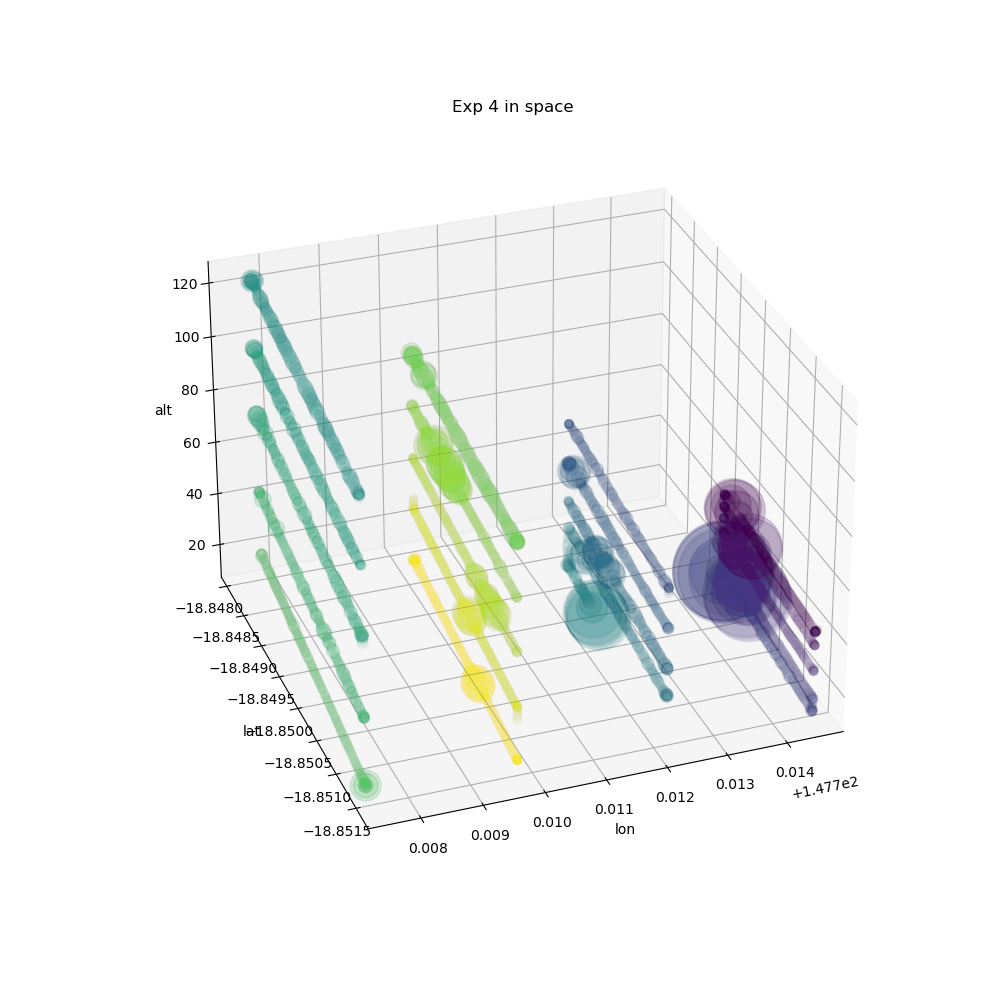

In [11]:
# ipympl works in Jupyter notebook
%matplotlib ipympl

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(projection = '3d')

ax.scatter(exp4['gps.lon'], exp4['gps.lat'], exp4['altitudeRelative'], 
           s = exp4['Concentration'].values/10,
           c = exp4['Transect_Num'].values,
           alpha = 0.02)

ax.set_ylim((np.min(exp4["gps.lat"]), np.max(exp4["gps.lat"])))
ax.set_xlim((np.min(exp4["gps.lon"]), np.max(exp4["gps.lon"])))

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')

ax.set_title("Exp 4 in space")
ax.view_init(elev = 30, azim = 250)
# ax.view_init(elev = 0, azim = 0)
# ax.view_init(elev = 0, azim = 250)

plt.show()

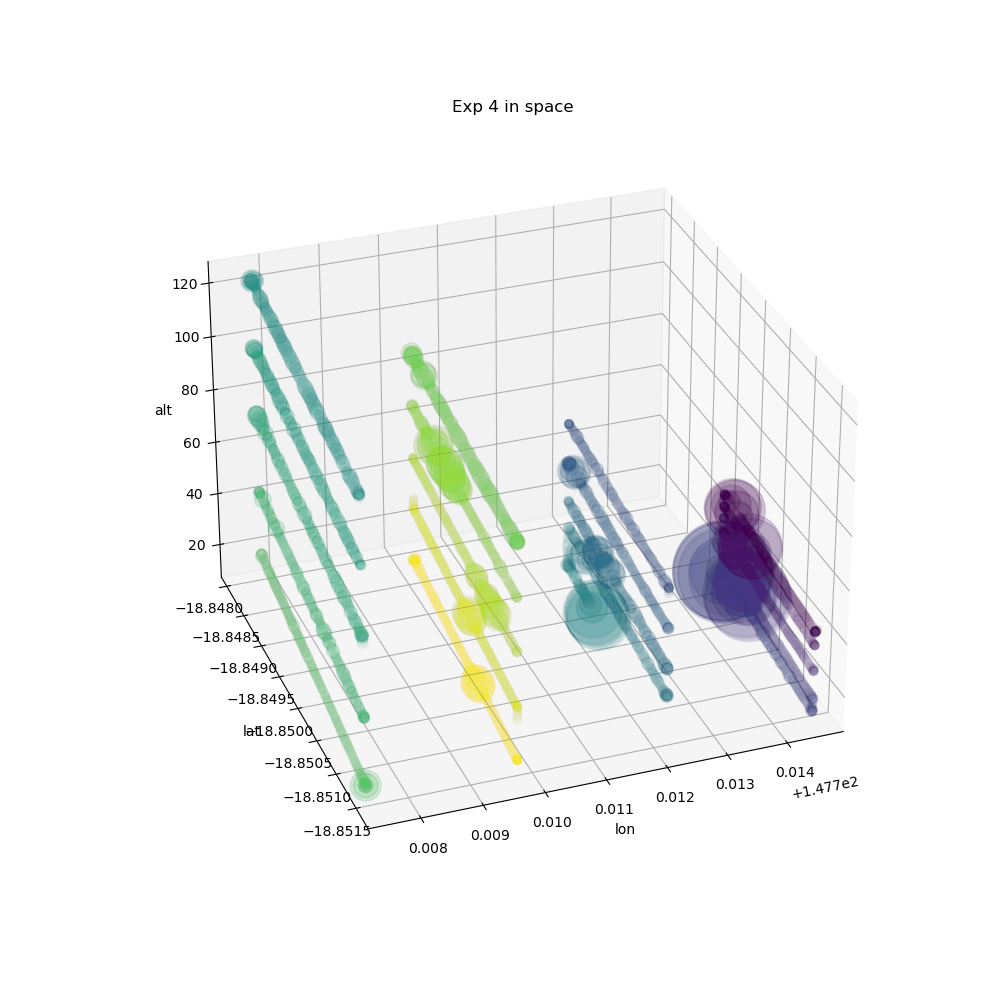

In [12]:
def threeD_vis_experiment(exp_name, data):
    """
    Produce interactive 3D vis of true longitude (x-axis), true latitude (y-axis), true altitude (z-axis)
    inputs: name (string) of selected experiment, dataset
    """
    # ipympl works in Jupyter notebook
    %matplotlib ipympl
    
    exp = data[data.Experiment == exp_name]

    fig = plt.figure(figsize = (10, 10))

    ax = fig.add_subplot(projection = '3d')

    ax.scatter(exp['gps.lon'], exp['gps.lat'], exp['altitudeRelative'], 
           s = exp['Concentration'].values/10,
           c = exp['Transect_Num'].values,
           alpha = 0.02)

    ax.set_ylim((np.min(exp["gps.lat"]), np.max(exp["gps.lat"])))
    ax.set_xlim((np.min(exp["gps.lon"]), np.max(exp["gps.lon"])))

    ax.set_xlabel('lon')
    ax.set_ylabel('lat')
    ax.set_zlabel('alt')

    ax.set_title(exp_name)
    ax.view_init(elev = 30, azim = 250)

plt.show()

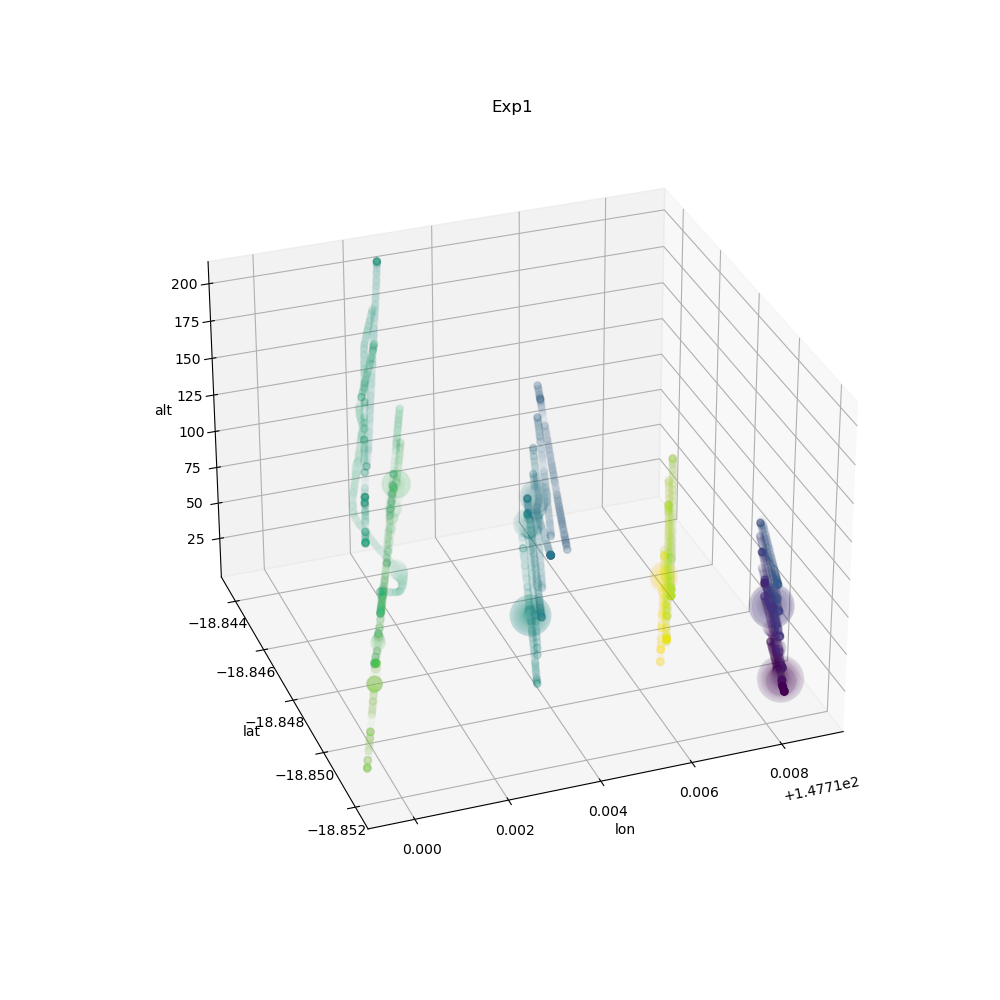

In [13]:
threeD_vis_experiment("Exp1", data)

In [14]:
data_notexp12 = data[data.Experiment != "Exp12"]

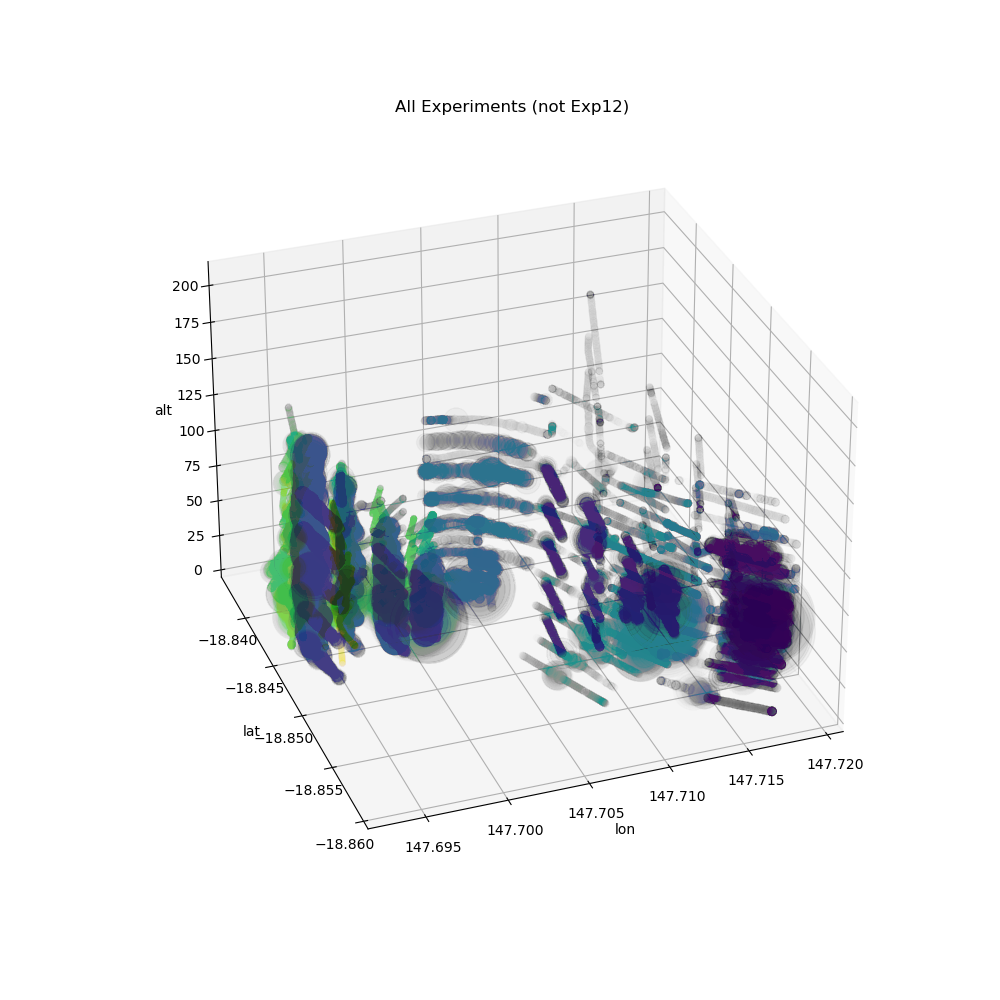

In [15]:
# ipympl works in Jupyter notebook
%matplotlib ipympl

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(projection = '3d')

ax.scatter(data_notexp12['gps.lon'], data_notexp12['gps.lat'], data_notexp12['altitudeRelative'], 
           s = data_notexp12['Concentration'].values/10,
           c = data_notexp12['Transect_Num'].values,
           alpha = 0.005)

ax.set_ylim((np.min(data_notexp12["gps.lat"]), np.max(data_notexp12["gps.lat"])))
ax.set_xlim((np.min(data_notexp12["gps.lon"]), np.max(data_notexp12["gps.lon"])))

ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_zlabel('alt')

ax.set_title("All Experiments (not Exp12)")
# subtitle
ax.view_init(elev = 30, azim = 250)
# ax.view_init(elev = 0, azim = 0)
# ax.view_init(elev = 0, azim = 250)

plt.show()

Ideas:
- group by wind direction
- normalise by strength
- group by time (assuming 45 minutes are too far apart for a plume to be consistent).